In [6]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [7]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() # getting the dataset

In [8]:
print(x_train.shape, x_test.shape) # 50k of 32x32 RGB images for training and 10k for test

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [5]:
y_train[0]

array([6], dtype=uint8)

In [10]:
# y_train and y_test are 2D arrays, we need to reshape them to a 1D array
y_train = y_train.reshape(-1, ) #-1 to keep the initial size, the empty 2nd param is to flatten the values, to have 6 instead of [6] for y_train[0] for example
y_test = y_test.reshape(-1, )
y_train[0]

6

Dataset info: https://www.cs.toronto.edu/~kriz/cifar.html

In [11]:
# Retrieving the 10 classes of the CIFAR10 dataset:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
# Helper function to display images with their class
def plot_image(x, y, index):
    plt.figure(figsize= (10,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

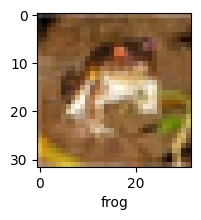

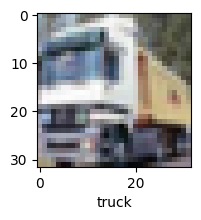

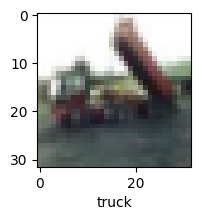

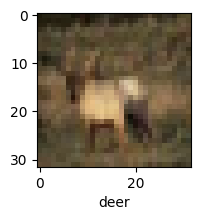

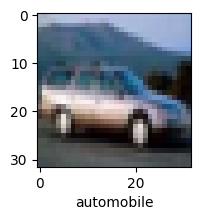

In [9]:
for i in range(5): # displaying the first 5 images in the train dataset
    plot_image(x_train, y_train, i)

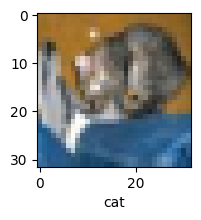

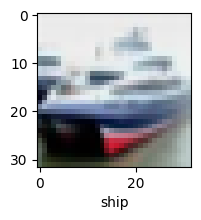

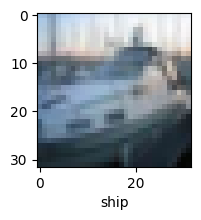

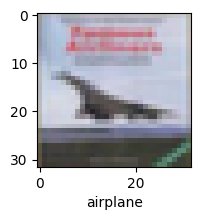

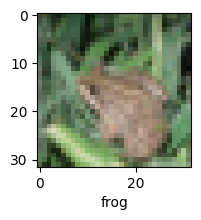

In [10]:
for i in range(5): # displaying the first 5 images in the test dataset
    plot_image(x_test, y_test, i)

## Normalising the data
( to have all image values between 0 and 1 )

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
#We divide the images by 255 because the maximum value of a pixel in an RGB image is 255
x_train = x_train/255.0
x_test = x_test/255.0

## Using GPU to accelerate training

In [7]:
print("Available devices: ", tf.config.list_physical_devices())

Available devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## ANN for image classification

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy', # spare becose the y value is a single digit not a vector
            metrics=['accuracy'])

with tf.device('/gpu:0'):
    ann.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8140 - accuracy: 0.3537
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6244 - accuracy: 0.4268
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5409 - accuracy: 0.4564
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4806 - accuracy: 0.4788
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4306 - accuracy: 0.4967
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3848 - accuracy: 0.5127
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3502 - accuracy: 0.5261
Epoch 8/10
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3137 - accuracy: 0.5381
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2821 - accuracy: 0.5508
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.252

In [15]:
with tf.device('/gpu:0'):
    ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3924 - accuracy: 0.5081


In [8]:
from sklearn.metrics import classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

NameError: name 'ann' is not defined

About 52% accuracy after 10 epochs.

## CNN for image classification

In [17]:
cnn = models.Sequential([
    # CNN Layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dense Layers
    layers.Flatten(), # the input shape is already specified in the first Conv2D layer
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy', # spare becose the y value is a single digit not a vector
            metrics=['accuracy'])
with tf.device('/gpu:0'):
    cnn.fit(x_train, y_train, epochs=10) # Training the CNN Model

Epoch 1/10
1563/1563 [==============================] - 16s 5ms/step - loss: 1.5765 - accuracy: 0.4231
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2267 - accuracy: 0.5622
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0870 - accuracy: 0.6177
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9896 - accuracy: 0.6527
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9166 - accuracy: 0.6806
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8563 - accuracy: 0.7006
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8105 - accuracy: 0.7174
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7694 - accuracy: 0.7310
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7361 - accuracy: 0.7433
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.70

In [18]:
with tf.device('/gpu:0'):
    cnn.evaluate(x_test, y_test) # Evaluating the model on data it has never seen before

313/313 [==============================] - 1s 3ms/step - loss: 0.8744 - accuracy: 0.7017


In [19]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.75      0.71      1000
           1       0.86      0.81      0.83      1000
           2       0.58      0.62      0.60      1000
           3       0.50      0.57      0.53      1000
           4       0.67      0.62      0.64      1000
           5       0.63      0.60      0.62      1000
           6       0.85      0.69      0.76      1000
           7       0.72      0.77      0.74      1000
           8       0.82      0.78      0.80      1000
           9       0.76      0.82      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



71% accuracy on average

In [20]:
cnn2 = models.Sequential([
    # CNN Layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

    layers.MaxPooling2D((2, 2)),

    # Dense Layers
    layers.Flatten(), # the input shape is already specified in the first Conv2D layer
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn2.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy', # spare becose the y value is a single digit not a vector
            metrics=['accuracy'])
with tf.device('/gpu:0'):
    cnn2.fit(x_train, y_train, epochs=10) # Training the CNN Model
    cnn2.evaluate(x_test, y_test) # Evaluating the model on data it has never seen before
y_pred = cnn2.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3731 - accuracy: 0.5060
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9637 - accuracy: 0.6632
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8094 - accuracy: 0.7194
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6927 - accuracy: 0.7594
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5883 - accuracy: 0.7955
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4906 - accuracy: 0.8271
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3997 - accuracy: 0.8583
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3280 - accuracy: 0.8842
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2665 - accuracy: 0.9058
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
Classification

In [22]:
cnn4 = models.Sequential([
    # CNN Layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),

    layers.Flatten(), # the input shape is already specified in the first Conv2D layer
    # Dense Layers
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])


cnn4.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', # spare becose the y value is a single digit not a vector
             metrics=['accuracy'])
with tf.device('/gpu:0'):
    cnn4.fit(x_train, y_train, epochs=10) # Training the CNN Model
    cnn4.evaluate(x_test, y_test) # Evaluating the model on data it has never seen before

y_pred = cnn4.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5945 - accuracy: 0.3993
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2019 - accuracy: 0.5678
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0553 - accuracy: 0.6221
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9704 - accuracy: 0.6552
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9077 - accuracy: 0.6825
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8599 - accuracy: 0.6984
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8175 - accuracy: 0.7150
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7791 - accuracy: 0.7288
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7520 - accuracy: 0.7387
Epoch 10/10
313/313 [==============================] - 1s 2ms/step
Classi

In [10]:
cnn3 = models.Sequential([
    # CNN Layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dense Layers
    layers.Flatten(), # the input shape is already specified in the first Conv2D layer
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', # spare becose the y value is a single digit not a vector
             metrics=['accuracy'])
with tf.device('/gpu:0'):
    cnn3.fit(x_train, y_train, epochs=10) # Training the CNN Model
    cnn3.evaluate(x_test, y_test) # Evaluating the model on data it has never seen before
y_pred = cnn3.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4910 - accuracy: 0.4583
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0744 - accuracy: 0.6192
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9197 - accuracy: 0.6786
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8124 - accuracy: 0.7150
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7282 - accuracy: 0.7428
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6637 - accuracy: 0.7671
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6029 - accuracy: 0.7883
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5477 - accuracy: 0.8078
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4977 - accuracy: 0.8246
Epoch 10/10
313/313 [==============================] - 1s 3ms/step
Classificatio

74% on average

In [11]:
# saving the best performing model
cnn3.save('model/model.h5')

In [13]:
from tensorflow.keras.models import load_model

model = load_model('model/model.h5')

ValueError: in user code:

    File "C:\Users\azedine\anaconda3\envs\gpu311\lib\site-packages\keras\engine\training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\azedine\anaconda3\envs\gpu311\lib\site-packages\keras\engine\training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\azedine\anaconda3\envs\gpu311\lib\site-packages\keras\engine\training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\azedine\anaconda3\envs\gpu311\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
        return self(x, training=False)
    File "C:\Users\azedine\anaconda3\envs\gpu311\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\azedine\anaconda3\envs\gpu311\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [ ]:
model.predict(x_test[0])

In [14]:
y_train[0]

6

In [17]:
x_test[0].shape

(32, 32, 3)

In [30]:
x_test_batch = []
for i in range(len(x_test)):
    x_test_batch.append(np.expand_dims(x_train[i], axis=0))
# x_test_batch.shape
# Should be (1, 32, 32, 3)


In [31]:
classes[y_train[0]]

'frog'

In [32]:
x_test_batch[0].shape

(1, 32, 32, 3)

In [40]:
np.argmax(model.predict(x_test_batch[0]))

1/1 [==============================] - 0s 60ms/step


5

In [35]:
x_train[0].shape

(32, 32, 3)

In [36]:
x_test_batch[0].shape

(1, 32, 32, 3)